In [43]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style="ticks", font_scale=1.2)

import pandas as pd
import numpy as np
from scipy import stats as st

import warnings
warnings.filterwarnings('ignore')

import sys, os
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from utils import *
from data_generating_funcs import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [64]:
df = pd.read_csv('../results/coverage_width50_iter10_2lnn.csv')

df.loc[df.variable.isin(['X1', 'X2']), 'Variable type'] = 'Important, correlated'
df.loc[df.variable.isin(['X3']), 'Variable type'] = 'Important, uncorrelated'
df.loc[df.variable.isin(['X4', 'X5', 'X6']), 'Variable type'] = 'Unimportant, uncorrelated'

iters = []
for i in range(10):
    iters += [i]*19#[i]*19 for i in np.arange(10)])
    
df['iters'] = iters
df['method'] = df.method.apply(lambda x: x.title())
df.loc[df.method == 'Lazy', 'method'] = 'LazyVI'

df2 = pd.merge(df[df.method.isin(['Dropout', 'LazyVI', 'Retrain'])], 
            df[df.method=='Retrain'][['iters', 'variable', 'vi']], on=['variable', 'iters'], suffixes=['', '_retrain'])
df2['Error'] = df2.vi - df2.vi_retrain

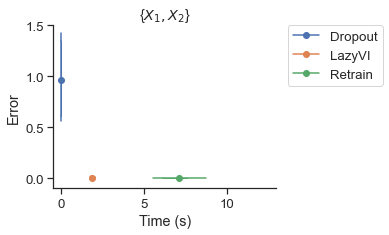

In [66]:
for grp in ['Important, correlated']:
    fig,ax = plt.subplots(figsize=(4,3))
    plt.ylim(-.1, 1.5)
    plt.xlim(-.5, 13)
    plt.xlabel('Time (s)')
    plt.ylabel('Error')
    d = df2[df2['Variable type'] == grp]
    colors = ['b', 'orange', 'g']

    for i, method in enumerate(['Dropout', 'LazyVI', 'Retrain']):

        d2 = d[d.method==method]
        boxplot_2d(d2.time, d2.Error, ax=ax, co=sns.color_palette()[i], method=method)
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        # Hide the right and top spines
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)

        # Only show ticks on the left and bottom spines
        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('left')

        plt.title('{$X_1, X_2$}')
        #plt.ylim((-.01, .02))



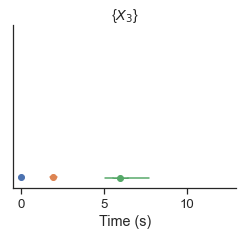

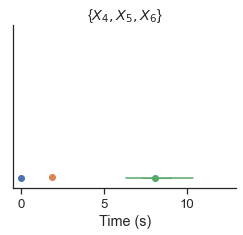

In [54]:
var_groups = ['{$X_3$}', '{$X_4, X_5, X_6$}']
for k, grp in enumerate(['Important, uncorrelated', 'Unimportant, uncorrelated']):
    fig,ax = plt.subplots(figsize=(4,3))
    plt.ylim(-.1, 1.5)
    plt.xlim(-.5, 13)
    plt.xlabel('Time (s)')
    #plt.ylabel('Error')
    d = df2[df2['Variable type'] == grp]
    colors = ['b', 'orange', 'g']

    for i, method in enumerate(['Dropout', 'LazyVI', 'Retrain']):

        d2 = d[d.method==method]
        boxplot_2d(d2.time, d2.Error, ax=ax, co=sns.color_palette()[i], method=method)
        #plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        # Hide the right and top spines
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        
        ax.axes.yaxis.set_ticks([])
        plt.title(var_groups[k])

In [4]:
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D

def boxplot_2d(x,y, ax, co='g', whis=1.5, method=''):
    xlimits = [np.percentile(x, q) for q in (25, 50, 75)]
    ylimits = [np.percentile(y, q) for q in (25, 50, 75)]

    ##the box
    box = Rectangle(
        (xlimits[0],ylimits[0]),
        (xlimits[2]-xlimits[0]),
        (ylimits[2]-ylimits[0]),
        ec = co,
        color = co,
        zorder=0
    )
    ax.add_patch(box)

    ##the x median
    vline = Line2D(
        [xlimits[1],xlimits[1]],[ylimits[0],ylimits[2]],
        color=co,
        zorder=1
    )
    ax.add_line(vline)

    ##the y median
    hline = Line2D(
        [xlimits[0],xlimits[2]],[ylimits[1],ylimits[1]],
        color=co,
        zorder=1
    )
    ax.add_line(hline)

    ##the central point
    ax.plot([xlimits[1]],[ylimits[1]], color=co, marker='o', label=method)

    ##the x-whisker
    ##defined as in matplotlib boxplot:
    ##As a float, determines the reach of the whiskers to the beyond the
    ##first and third quartiles. In other words, where IQR is the
    ##interquartile range (Q3-Q1), the upper whisker will extend to
    ##last datum less than Q3 + whis*IQR). Similarly, the lower whisker
    ####will extend to the first datum greater than Q1 - whis*IQR. Beyond
    ##the whiskers, data are considered outliers and are plotted as
    ##individual points. Set this to an unreasonably high value to force
    ##the whiskers to show the min and max values. Alternatively, set this
    ##to an ascending sequence of percentile (e.g., [5, 95]) to set the
    ##whiskers at specific percentiles of the data. Finally, whis can
    ##be the string 'range' to force the whiskers to the min and max of
    ##the data.
    iqr = xlimits[2]-xlimits[0]

    ##left
    left = np.min(x[x > xlimits[0]-whis*iqr])
    whisker_line = Line2D(
        [left, xlimits[0]], [ylimits[1],ylimits[1]],
        color = co,
        zorder = 1
    )
    ax.add_line(whisker_line)
    whisker_bar = Line2D(
        [left, left], [ylimits[0],ylimits[2]],
        color = co,
        zorder = 1
    )
    ax.add_line(whisker_bar)

    ##right
    right = np.max(x[x < xlimits[2]+whis*iqr])
    whisker_line = Line2D(
        [right, xlimits[2]], [ylimits[1],ylimits[1]],
        color = co,
        zorder = 1
    )
    ax.add_line(whisker_line)
    whisker_bar = Line2D(
        [right, right], [ylimits[0],ylimits[2]],
        color = co,
        zorder = 1
    )
    ax.add_line(whisker_bar)

    ##the y-whisker
    iqr = ylimits[2]-ylimits[0]

    ##bottom
    bottom = np.min(y[y > ylimits[0]-whis*iqr])
    whisker_line = Line2D(
        [xlimits[1],xlimits[1]], [bottom, ylimits[0]], 
        color = co,
        zorder = 1
    )
    ax.add_line(whisker_line)
    whisker_bar = Line2D(
        [xlimits[0],xlimits[2]], [bottom, bottom], 
        color = co,
        zorder = 1
    )
    ax.add_line(whisker_bar)

    ##top
    top = np.max(y[y < ylimits[2]+whis*iqr])
    whisker_line = Line2D(
        [xlimits[1],xlimits[1]], [top, ylimits[2]], 
        color = co,
        zorder = 1
    )
    ax.add_line(whisker_line)
    whisker_bar = Line2D(
        [xlimits[0],xlimits[2]], [top, top], 
        color = co,
        zorder = 1
    )
    ax.add_line(whisker_bar)

In [68]:
df.groupby(['method', 'iters']).time.sum().groupby('method').mean()

method
dropout        0.000000
full model     9.509513
lazy          11.358537
retrain       44.568166
Name: time, dtype: float64

In [65]:
df2.groupby(['method']).error.agg(['mean', 'sem'])

,mean,sem
method,,
dropout,0.331729,0.066270
lazy,0.008940,0.000715


In [36]:
df[df.variable!='all'].groupby(['method', 'variable'])[['time', 'vi']].mean().pivot_table(index='method', columns='variable', values='vi')

variable,X1,X2,X3,X4,X5,X6
method,,,,,,
dropout,2.318046,1.031720,0.289522,0.001071,-0.000478,0.307248
lazy,0.965698,0.427952,0.287622,-0.005632,-0.006696,0.306936
retrain,0.957362,0.431364,0.297429,0.002142,-0.002489,0.321679


<AxesSubplot:xlabel='variable', ylabel='vi'>

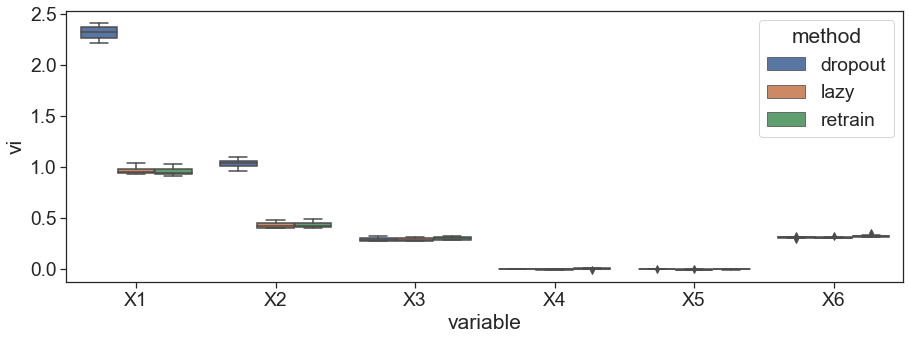

In [29]:
plt.figure(figsize=(15,5))
sns.boxplot(x='variable', y='vi', hue='method', data=df[df.variable!='all'])

In [154]:
df_time = df.pivot_table(index=['variable', 'corr'], columns='method', values='time').reset_index()

In [156]:
df_time['Ratio'] = df_time.Retrain/df_time.LazyVI

In [165]:
df_time.groupby('variable').mean()

method,corr,Dropout,LazyVI,Retrain,Ratio
variable,,,,,
X1,0.5,0.0,1.870836,16.664810,8.904897
X2,0.5,0.0,1.837314,7.624542,4.148983


In [169]:
16.7/1.8

9.277777777777777

<AxesSubplot:xlabel='corr', ylabel='Ratio'>

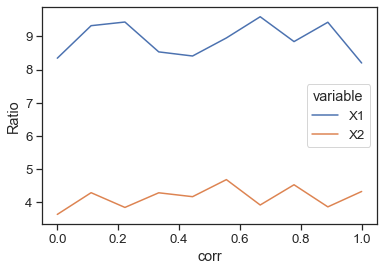

In [163]:
sns.lineplot(x='corr', y='Ratio', hue='variable', data=df_time)

Text(317.776, 0.5, 'Estimated variable importance for $X_1$')

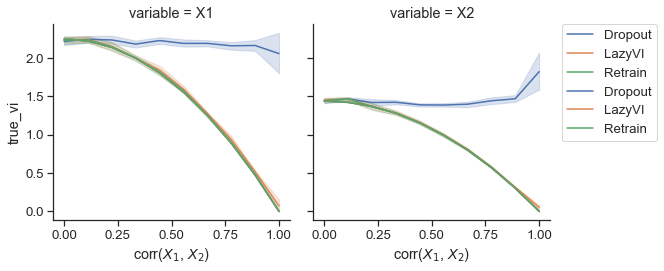

In [105]:
g = sns.FacetGrid(df, col="variable", hue="method", height=4)
g.map(sns.lineplot, "corr($X_1$, $X_2$)", "Estimated variable importance")
plt.ylabel('$\hat{VI}_1 - VI_1$')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('corr($X_1$, $X_2$)')
plt.ylabel('Estimated variable importance for $X_1$')

Text(0.5, 1.0, 'Variable importance for $X_1$')

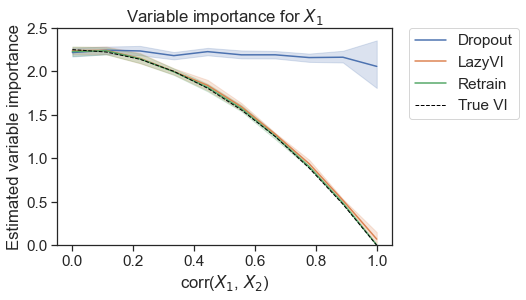

In [129]:
plt.figure(figsize=(6,4))
sns.set(style="ticks", font_scale=1.4)

df['Method'] = df.method.str.title()
sns.lineplot("corr($X_1$, $X_2$)", "Estimated variable importance", hue='method', data=df[df.variable=='X1'])
plt.plot(df[df.variable=='X1']['corr($X_1$, $X_2$)'], df[df.variable=='X1'].true_vi, '--', 
         c='black', linewidth=1, label='True VI')
plt.legend()
#plt.xlabel('corr($X_1$, $X_2$)')
#plt.ylabel('Estimated variable importance for $X_1$')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylim([0,2.5])
plt.title('Variable importance for $X_1$')

Text(0.5, 1.0, 'Variable importance for $X_2$')

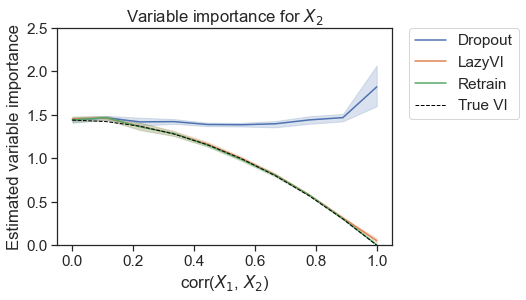

In [130]:
plt.figure(figsize=(6,4))
sns.set(style="ticks", font_scale=1.4)

df['Method'] = df.method.str.title()
sns.lineplot("corr($X_1$, $X_2$)", "Estimated variable importance", hue='method', data=df[df.variable=='X2'])
plt.plot(df[df.variable=='X2']['corr($X_1$, $X_2$)'], df[df.variable=='X2'].true_vi, '--', 
         c='black', linewidth=1, label='True VI')
plt.legend()
#plt.xlabel('corr($X_1$, $X_2$)')
#plt.ylabel('Estimated variable importance for $X_1$')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylim([0,2.5])
plt.title('Variable importance for $X_2$')

In [131]:
df.groupby('method').time.mean()

method
Dropout     0.000000
LazyVI      1.854075
Retrain    12.144676
Name: time, dtype: float64

<AxesSubplot:xlabel='variable', ylabel='hit'>

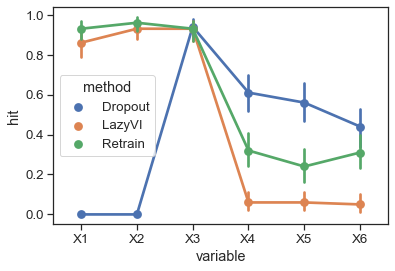

In [16]:
sns.pointplot(x='variable', y='hit', hue='method', data=df2, linewidth=.5)

<AxesSubplot:xlabel='variable', ylabel='time'>

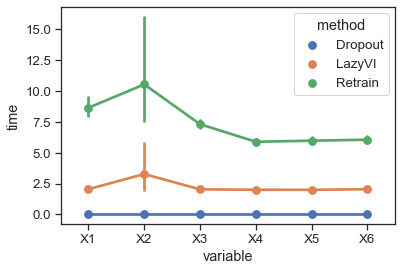

In [20]:
sns.pointplot(x='variable', y='time', hue='method', data=df2, linewidth=.5)

In [21]:
df2.loc[df2.variable.isin(['X1', 'X2']), 'Variable type'] = 'Important, correlated'
df2.loc[df2.variable.isin(['X3']), 'Variable type'] = 'Important, uncorrelated'
df2.loc[df2.variable.isin(['X4', 'X5', 'X6']), 'Variable type'] = 'Unimportant, uncorrelated'

In [48]:
grp = df2.groupby(['Variable type', 'method'])[['Error', 'time']].agg(['mean', 'se']).reset_index()
grp.columns = ['Variable type', 'Method', 'Average Error', 'error_se', 'Average Time (s)', 'time_se']

grp1 = grp[grp['Variable type'] == 'Important, correlated']
grp2 = grp[grp['Variable type'] == 'Important, uncorrelated']
grp3 = grp[grp['Variable type'] == 'Unimportant, uncorrelated']

In [75]:
df2.groupby(['Variable type', 'method'])[['Error', 'time']].describe()

Error                                \
                                   count      mean       std       min   
Variable type             method                                         
Important, correlated     Dropout  200.0  0.980774  0.224542  0.622753   
                          LazyVI   200.0  0.017682  0.032859 -0.061772   
                          Retrain  200.0  0.010858  0.029566 -0.083901   
Important, uncorrelated   Dropout  100.0 -0.000878  0.038990 -0.076111   
                          LazyVI   100.0 -0.000850  0.039820 -0.080054   
                          Retrain  100.0  0.004876  0.039352 -0.078475   
Unimportant, uncorrelated Dropout  300.0  0.000542  0.000908 -0.002134   
                          LazyVI   300.0 -0.007128  0.003709 -0.014069   
                          Retrain  300.0 -0.002280  0.002654 -0.009288   

                                                                           \
                                        25%       50%       75%       max   
Variable type             method                                            
Important, correlated     Dropout  0.771055  0.962127  1.193443  1.417828   
                          LazyVI  -0.002774  0.013766  0.035181  0.126448   
                          Retrain -0.009779  0.012936  0.028519  0.092185   
Important, uncorrelated   Dropout -0.030115 -0.000818  0.023917  0.136236   
                          LazyVI  -0.029197 -0.003154  0.025751  0.133327   
                          Retrain -0.023075  0.001394  0.030686  0.134148   
Unimportant, uncorrelated Dropout  0.000008  0.000556  0.001130  0.003458   
                          LazyVI  -0.010058 -0.007591 -0.004308  0.001496   
                          Retrain -0.004183 -0.002097 -0.000436  0.004270   

                                    time                                 \
                                   count      mean        std       min   
Variable type             method                                          
Important, correlated     Dropout  200.0  0.000000   0.000000  0.000000   
                          LazyVI   200.0  2.659287   8.883504  1.730830   
                          Retrain  200.0  9.592455  18.341927  3.667213   
Important, uncorrelated   Dropout  100.0  0.000000   0.000000  0.000000   
                          LazyVI   100.0  2.030389   0.288131  1.737907   
                          Retrain  100.0  7.308107   1.681528  3.202473   
Unimportant, uncorrelated Dropout  300.0  0.000000   0.000000  0.000000   
                          LazyVI   300.0  2.012248   0.252753  1.722440   
                          Retrain  300.0  5.973526   1.401764  2.840108   

                                                                             
                                        25%       50%       75%         max  
Variable type             method                                             
Important, correlated     Dropout  0.000000  0.000000  0.000000    0.000000  
                          LazyVI   1.864854  1.968947  2.105026  127.595896  
                          Retrain  6.660850  8.044276  9.237641  262.581621  
Important, uncorrelated   Dropout  0.000000  0.000000  0.000000    0.000000  
                          LazyVI   1.865117  1.948569  2.101740    3.853890  
                          Retrain  6.367567  7.433726  8.260214   12.871579  
Unimportant, uncorrelated Dropout  0.000000  0.000000  0.000000    0.000000  
                          LazyVI   1.847130  1.979865  2.080957    4.115843  
                          Retrain  5.001879  5.910237  6.826786   11.347859

<ErrorbarContainer object of 3 artists>

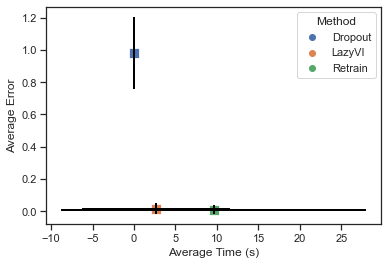

In [51]:
sns.scatterplot(x='Average Time (s)', y='Average Error', hue='Method', data=grp1, marker=',', s=100)


plt.errorbar(x=grp1['Average Time (s)'], 
             y=grp1['Average Error'], 
             xerr = grp1.time_se, 
             yerr = grp1.error_se, capsize=0, ls='none', color='black', 
            elinewidth=2)


<ErrorbarContainer object of 3 artists>

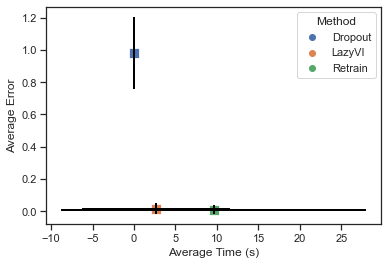

In [50]:
sns.scatterplot(x='Average Time (s)', y='Average Error', hue='Method', data=grp1, marker=',', s=100)


plt.errorbar(x=grp1['Average Time (s)'], 
             y=grp1['Average Error'], 
             xerr = grp1.time_se, 
             yerr = grp1.error_se, capsize=0, ls='none', color='black', 
            elinewidth=2)


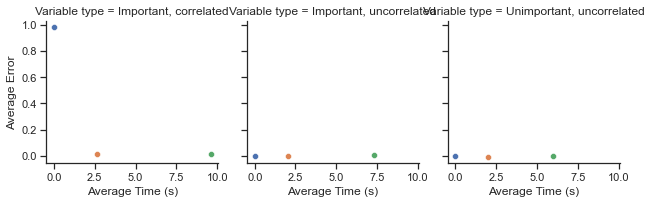

In [34]:
g = sns.FacetGrid(grp, col="Variable type", hue="Method")
g.map(sns.scatterplot, "Average Time (s)", "Average Error")

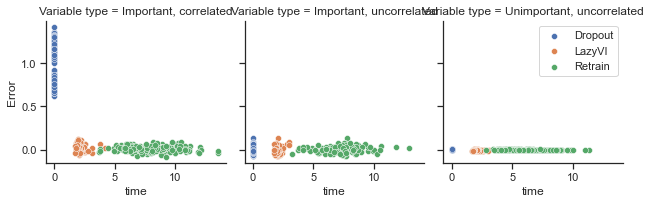

In [25]:
sns.set_theme(style="ticks")

g = sns.FacetGrid(df2[df2.time<30], col="Variable type", hue="method")
g.map(sns.scatterplot, "time", "Error")
plt.ylabel('$\hat{VI}_1 - VI_1$')
plt.legend()

In [71]:
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D

import numpy as np

def boxplot_2d(x,y, ax, whis=1.5):
    xlimits = [np.percentile(x, q) for q in (25, 50, 75)]
    ylimits = [np.percentile(y, q) for q in (25, 50, 75)]

    ##the box
    box = Rectangle(
        (xlimits[0],ylimits[0]),
        (xlimits[2]-xlimits[0]),
        (ylimits[2]-ylimits[0]),
        #ec = 'k',
        zorder=0
    )
    ax.add_patch(box)

    ##the x median
    vline = Line2D(
        [xlimits[1],xlimits[1]],[ylimits[0],ylimits[2]],
        #color='k',
        zorder=1
    )
    ax.add_line(vline)

    ##the y median
    hline = Line2D(
        [xlimits[0],xlimits[2]],[ylimits[1],ylimits[1]],
        #color='k',
        zorder=1
    )
    ax.add_line(hline)

    ##the central point
    ax.plot([xlimits[1]],[ylimits[1]], marker='o')

    iqr = xlimits[2]-xlimits[0]

    ##left
    left = np.min(x[x > xlimits[0]-whis*iqr])
    whisker_line = Line2D(
        [left, xlimits[0]], [ylimits[1],ylimits[1]],
        #color = 'k',
        zorder = 1
    )
    ax.add_line(whisker_line)

    ##right
    right = np.max(x[x < xlimits[2]+whis*iqr])
    whisker_line = Line2D(
        [right, xlimits[2]], [ylimits[1],ylimits[1]],
        #color = 'k',
        zorder = 1
    )
    ax.add_line(whisker_line)

    ##the y-whisker
    iqr = ylimits[2]-ylimits[0]

    ##bottom
    bottom = np.min(y[y > ylimits[0]-whis*iqr])
    whisker_line = Line2D(
        [xlimits[1],xlimits[1]], [bottom, ylimits[0]], 
        #color = 'k',
        zorder = 1
    )
    ax.add_line(whisker_line)

    ##top
    top = np.max(y[y < ylimits[2]+whis*iqr])
    whisker_line = Line2D(
        [xlimits[1],xlimits[1]], [top, ylimits[2]], 
        #color = 'k',
        zorder = 1
    )
    ax.add_line(whisker_line)

    


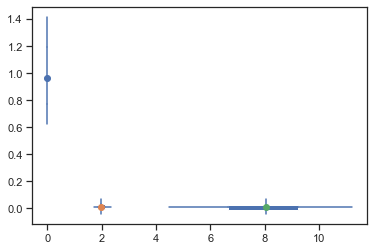

In [73]:
fig,ax = plt.subplots()
d = df2[df2['Variable type'] == 'Important, correlated']

for method in ['Dropout', 'LazyVI', 'Retrain']:
    d2 = d[d.method==method]
    boxplot_2d(d2.time, d2.Error, ax, c=colors[j], whis=1)

In [74]:
d2

,variable,method,time,vi,train_loss,test_loss,se,true_vi,hit,Error,Variable type
3,X1,Retrain,8.461645,1.030028,0.992091,1.052132,0.036835,0.984375,1,0.045653,"Important, correlated"
6,X2,Retrain,6.522993,0.700005,0.633551,0.722109,0.026131,0.630000,0,0.070005,"Important, correlated"
22,X1,Retrain,9.986728,0.944280,0.987932,0.970431,0.032581,0.984375,1,-0.040095,"Important, correlated"
25,X2,Retrain,7.666212,0.575229,0.638093,0.601379,0.020748,0.630000,0,-0.054771,"Important, correlated"
41,X1,Retrain,10.871950,0.957353,0.938269,0.979879,0.034550,0.984375,1,-0.027022,"Important, correlated"
...,...,...,...,...,...,...,...,...,...,...,...
1849,X2,Retrain,6.043745,0.689922,0.625961,0.716631,0.026160,0.630000,0,0.059922,"Important, correlated"
1865,X1,Retrain,5.865938,0.970738,0.974266,0.993752,0.032362,0.984375,1,-0.013637,"Important, correlated"
1868,X2,Retrain,3.737346,0.618783,0.652261,0.641796,0.022607,0.630000,1,-0.011217,"Important, correlated"
1884,X1,Retrain,9.264643,0.900474,1.001238,0.927296,0.031872,0.984375,0,-0.083901,"Important, correlated"
